In [6]:
import keras
from keras import layers,models
from keras import datasets
from keras.utils import np_utils  # one-hot Encoding
import numpy as np
import pandas as pd

In [41]:
# 1. data loader
(X_train,y_train),(X_test,y_test)=datasets.mnist.load_data()

In [42]:
## 2. X data 전처리
# 2-1. vectorize
# L,W,H=X_train.shape
# X_train=X_train.reshape(-1,W*H) # 1차원으로 펼치기
X_test=X_test.reshape(-1,W*H)
y_train
y_test

# 2-2. scailing
# X_train=X_train/255
# X_test=X_test/255

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [61]:
## 3. Y data 전처리
'''
one-hot Encoding : 각 노드에서 이미지에 해당하는 예측값을 0~1 사이의 확률 분포로 만들기
'''

Y_train=np_utils.to_categorical(y_train)
Y_test=np_utils.to_categorical(y_test)
Y_train[30],y_train[30]

(array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32), 3)

In [62]:
# 4. Setting Hyperparameter
input_size=28*28
hidden_size=100
num_classes=10
epochs=10
batch_size=100

In [100]:
# 5. Model
model=models.Sequential()
# 히든레이어 유닛수,활성화함수,입력단
model.add(layers.Dense(hidden_size,activation="relu",input_shape=(input_size,)))
# 출력단
model.add(layers.Dense(num_classes,activation="softmax"))

In [101]:
# 6. Compile
# metrics : 평가지표
model.compile("adam","categorical_crossentropy",metrics=['accuracy'])


In [102]:
# 7. Training
model.fit(X_train,Y_train,epochs=epochs,batch_size=batch_size,validation_split=0.2,verbose=0)

In [103]:
# 8. Predict

In [104]:
# 9. Evaluate
model_performance=model.evaluate(X_test,Y_test,batch_size=batch_size)
print("Loss : {}, Accuracy : {}".format(*model_performance))

10000/10000 [==============================] - 0s 15us/step
Loss : 0.08345566493226216, Accuracy : 0.9754999876022339


In [105]:
# 10. 시각화
# fit, 트레이닝할 때 나오는 로그 메세지를 모아서 리턴 - history
import matplotlib.pyplot as plt
def plot_loss(history):
    plt.plot(history.history["loss"])
    plt.plot(history.history["val_loss"])
    plt.legend()
    plt.title("Loss")
    plt.ylabel("Loss")
    plt.xlabel("Epoch")

def plot_acc(history):
    plt.plot(history.history["accuracy"])
    plt.plot(history.history["val_accuracy"])
    
    plt.title("accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("Epoch")
    plt.legend()
history=model.fit(X_train,Y_train,epochs=50,batch_size=batch_size,validation_split=0.2)
    
    

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 1s 27us/step - loss: 0.0338 - accuracy: 0.9915 - val_loss: 0.0896 - val_accuracy: 0.9745
Epoch 2/50
48000/48000 [==============================] - 2s 36us/step - loss: 0.0298 - accuracy: 0.9925 - val_loss: 0.0934 - val_accuracy: 0.9737
Epoch 3/50
48000/48000 [==============================] - 1s 28us/step - loss: 0.0250 - accuracy: 0.9939 - val_loss: 0.0912 - val_accuracy: 0.9742
Epoch 4/50
48000/48000 [==============================] - 1s 28us/step - loss: 0.0220 - accuracy: 0.9945 - val_loss: 0.0977 - val_accuracy: 0.9736
Epoch 5/50
48000/48000 [==============================] - 1s 29us/step - loss: 0.0188 - accuracy: 0.9958 - val_loss: 0.0909 - val_accuracy: 0.9754
Epoch 6/50
48000/48000 [==============================] - 2s 38us/step - loss: 0.0159 - accuracy: 0.9966 - val_loss: 0.0927 - val_accuracy: 0.9753
Epoch 7/50
48000/48000 [==============================] - 1s 28us/st

No handles with labels found to put in legend.


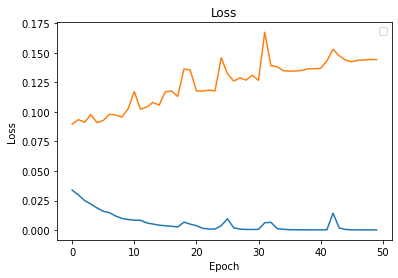

In [106]:
plot_loss(history)

No handles with labels found to put in legend.


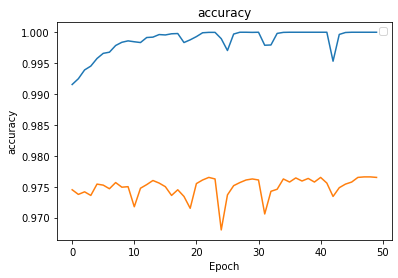

In [107]:
plot_acc(history)